<a href="https://colab.research.google.com/github/nikashahabi/Cryptic-Unstable-Transcripts-Identification-with-Deep-Learning/blob/main/Part7_FinetuningOnPretrainedModelWithNewData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting to drive and connecting to dnabert github files

In [ ]:
import numpy as np
i = np.zeros(10)
i

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
i[9] = 1
score = i
cond1 = (score > np.mean(score))

print(cond1)
cond1.shape
cond2 = (score >= 10*np.min(score))
cond = [cond1, cond2]
cond = np.asarray(cond)
print(cond)

[False False False False False False False False False  True]
[[False False False False False False False False False  True]
 [ True  True  True  True  True  True  True  True  True  True]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Bioinformatics/DNABERT-master

/content/drive/MyDrive/Bioinformatics/DNABERT-master


In [ ]:
!python3 -m pip install --editable .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Bioinformatics/DNABERT-master
     |████████████████████████████████| 5.7 MB 13.9 MB/s 
     |████████████████████████████████| 132 kB 66.7 MB/s 
     |████████████████████████████████| 1.3 MB 65.6 MB/s 
     |████████████████████████████████| 880 kB 51.9 MB/s 
     |████████████████████████████████| 9.3 MB 35.9 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 140 kB 77.6 MB/s 
     |████████████████████████████████| 127 kB 69.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=390db155cb8e28f92fef75d2e7fb23b2f8501ebf86a044ee838b3fba3e0faef4
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3

In [ ]:
cd /content/drive/MyDrive/Bioinformatics/DNABERT-master/examples/

/content/drive/MyDrive/Bioinformatics/DNABERT-master/examples


In [ ]:
!python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 14.7 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 106 kB 61.3 MB/s 
     |████████████████████████████████| 2.6 MB 69.9 MB/s 
     |████████████████████████████████| 12.5 MB 52.7 MB/s 
     |████████████████████████████████| 1.1 MB 57.9 MB/s 
     |████████████████████████████████| 15.1 MB 41.3 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=3e07d92e59e10205d00fac447e0ffcccf428b4e06508c9dfda1b50f772be3f2a
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
  Created wheel for pybedtools: filename=pybedtools-0.9.0-cp37-cp37m-linux_x86_64.whl size=13616804 sha256=9da2ae57cad1d9750cbedb48dffcb9b8c15453fc0548d929cd977b5f1a358424
  Stored in directory: /root/.cache/pip/wheels/7a/44/0d/3a744988

In [ ]:
cd /content/drive/MyDrive/Bioinformatics

/content/drive/MyDrive/Bioinformatics


In [ ]:
# !unzip 6-new-12w-0.zip

In [ ]:
cd /content/drive/MyDrive/Bioinformatics/DNABERT-master/examples


/content/drive/MyDrive/Bioinformatics/DNABERT-master/examples


# Making data in 6mer format/ fetching the data and getting some insights

In [ ]:
# KMER = "6"

In [ ]:
def seq2kmer(seq, k=6):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [ ]:
# snRNA = pd.read_csv("/content/drive/MyDrive/Bioinformatics/snRNA.csv", header = None)
# snoRNA = pd.read_csv("/content/drive/MyDrive/Bioinformatics/snoRNA.csv", header = None)
# noncoding = pd.read_csv("/content/drive/MyDrive/Bioinformatics/noncoding_sequences.csv")
# overlapping_cuts = pd.read_csv("/content/drive/MyDrive/Bioinformatics/overlapping_cut_sequences.csv")
# nonoverlapping_cuts = pd.read_csv("/content/drive/MyDrive/Bioinformatics/nonoverlapping_cut_sequences.csv")


In [ ]:
# snRNA.rename(columns={0:'sequence'},inplace=True)
# snRNA['label'] = 0

In [ ]:
# snoRNA.rename(columns={0:'sequence'},inplace=True)
# snoRNA['label'] = 0

In [ ]:
# noncoding.drop(columns=['Unnamed: 0'],inplace=True)
# noncoding['label'] = 0

In [ ]:
# overlapping_cuts.drop(columns=['Unnamed: 0'],inplace=True)
# overlapping_cuts['label'] = 1

In [ ]:
# nonoverlapping_cuts.drop(columns=['Unnamed: 0'],inplace=True)
# nonoverlapping_cuts['label'] = 1

In [ ]:
# overlapping_cuts.drop_duplicates(inplace = True)
# nonoverlapping_cuts.drop_duplicates(inplace = True)
# noncoding.drop_duplicates(inplace = True)
# snRNA.drop_duplicates(inplace = True)
# snoRNA.drop_duplicates(inplace = True)

In [ ]:
# shuffled_df = pd.concat([snRNA,snoRNA,noncoding,overlapping_cuts,nonoverlapping_cuts]).sample(frac=1)
# shuffled_df['label'] = shuffled_df['label'].astype(int)

In [ ]:
# shuffled_df['label'].value_counts()

In [ ]:
# shuffled_df.drop_duplicates() ['label'].value_counts()


In [ ]:
# shuffled_df.drop_duplicates(inplace = True)

In [ ]:
# shuffled_df.to_pickle('/content/drive/MyDrive/Bioinformatics/shuffled_sd_with_labels_and_sequences_with_new_data')
# import numpy as np
# lengths = shuffled_df["sequence"].str.len()
# lengths.mean()


In [ ]:
# shuffled_df['sequence'] = shuffled_df['sequence'].apply(seq2kmer)
# shuffled_df.to_pickle('/content/drive/MyDrive/Bioinformatics/shuffled_sd_with_labels_and_sequences_with_new_data_with_kmer')

In [ ]:
import pandas as pd
# shuffled_df = pd.read_pickle('/content/drive/MyDrive/Bioinformatics/shuffled_sd_with_labels_and_sequences_with_new_data_with_kmer')
shuffled_df = pd.read_csv('/content/drive/MyDrive/Bioinformatics/snRNA + snoRNA + ncRNA + other ncRNAs from paper + overlapping cuts + nonoverlappingcuts (kmer formats and labels).csv')


In [ ]:
shuffled_df

,Unnamed: 0,sequence,label
0,0,TAAAAT AAAATG AAATGA AATGAT ATGATG TGATGA GATG...,0
1,1,AAGCGG AGCGGA GCGGAA CGGAAT GGAATC GAATCG AATC...,1
2,2,TAACAA AACAAC ACAACT CAACTC AACTCA ACTCAC CTCA...,0
3,3,TGTAAT GTAATT TAATTA AATTAA ATTAAC TTAACA TAAC...,1
4,4,AATATA ATATAA TATAAT ATAATG TAATGT AATGTG ATGT...,1
...,...,...,...
1307,1308,GGTCCT GTCCTA TCCTAT CCTATA CTATAG TATAGT ATAG...,0
1308,1309,TTTATT TTATTC TATTCT ATTCTA TTCTAC TCTACT CTAC...,1
1309,1310,GTAATA TAATAC AATACA ATACAT TACATC ACATCA CATC...,0
1310,1311,AGAGGA GAGGAA AGGAAA GGAAAA GAAAAC AAAACA AAAC...,0


In [ ]:
lengths = shuffled_df["sequence"].str.len()
import statistics
statistics.variance(lengths)

16790975.67927515

In [ ]:
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1312 non-null   int64 
 1   sequence    1312 non-null   object
 2   label       1312 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.9+ KB


In [ ]:
import numpy as np
lengths = shuffled_df["sequence"].str.len()
lengths.min()

41

In [ ]:
shuffled_df = shuffled_df.drop('Unnamed: 0', axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


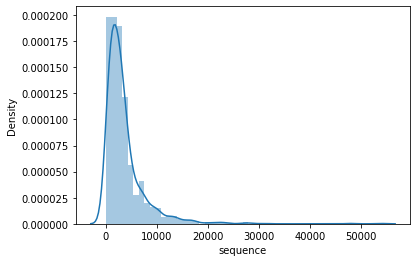

In [ ]:
import seaborn as sns
sns.distplot(lengths)

In [ ]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(shuffled_df, test_size=0.2)
# test, validation = train_test_split(test, test_size=0.5)
# train.to_csv('/content/drive/MyDrive/Bioinformatics/snRNA + snoRNA + ncRNA + other ncRNAs from paper + overlapping cuts + nonoverlappingcuts train set for finetuning.csv')
# test.to_csv('/content/drive/MyDrive/Bioinformatics/snRNA + snoRNA + ncRNA + other ncRNAs from paper + overlapping cuts + nonoverlappingcuts test set for finetuning.csv')
# validation.to_csv('/content/drive/MyDrive/Bioinformatics/snRNA + snoRNA + ncRNA + other ncRNAs from paper + overlapping cuts + nonoverlappingcuts validation set for finetuning.csv')
# # from imblearn.over_sampling import SMOTE

# # # create artificial data with SMOTE
# # oversample = SMOTE()
# # X_train_smote, y_train_smote = oversample.fit_resample(train_2['sequence'], train_2['label'])
# # # count number of records in each class
# # count = Counter(y_train_smote)
# # print(count)


In [ ]:
# print(train['label'].value_counts())
# print(test['label'].value_counts())
# print(validation['label'].value_counts())
# print(train[train.label == 1].shape[0] /(train[train.label == 0].shape[0] ))

1    734
0    315
Name: label, dtype: int64
1    83
0    48
Name: label, dtype: int64
1    89
0    43
Name: label, dtype: int64
2.3301587301587303


### Naive oversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_train = train['sequence'].to_numpy().reshape(-1, 1)
# y_train = train['label'].to_numpy().reshape(-1, 1)
# X_over, y_over = oversample.fit_resample(X_train, y_train)
# from collections import Counter
# # summarize class distribution
# print(Counter(y_over))

Counter({1: 734, 0: 734})


In [ ]:
# from re import X
# # importiong the modules
# import pandas as pd
# import numpy as np
# print(X_over.flatten().shape,  y_over.shape)
# data = {
#   "sequence": X_over.flatten().tolist(),
#   "label": y_over.flatten().tolist()
# }

# #load data into a DataFrame object:
# df_train_oversample = pd.DataFrame(data)
# # displaying the dataframe
# print(df_train_oversample)


(1468,) (1468,)
                                               sequence  label
0     AGTACT GTACTG TACTGC ACTGCC CTGCCC TGCCCT GCCC...      1
1     TAACAT AACATG ACATGG CATGGT ATGGTG TGGTGT GGTG...      1
2     CCTTGT CTTGTT TTGTTT TGTTTT GTTTTA TTTTAT TTTA...      1
3     GGTGGT GTGGTG TGGTGA GGTGAT GTGATA TGATAA GATA...      1
4     CAGACT AGACTG GACTGA ACTGAA CTGAAG TGAAGA GAAG...      0
...                                                 ...    ...
1463  GGGCGT GGCGTG GCGTGT CGTGTG GTGTGG TGTGGT GTGG...      0
1464  CTTTCA TTTCAG TTCAGC TCAGCT CAGCTC AGCTCG GCTC...      0
1465  TCCAAC CCAACA CAACAA AACAAG ACAAGT CAAGTT AAGT...      0
1466  ATTTGT TTTGTT TTGTTA TGTTAT GTTATA TTATAT TATA...      0
1467  GTTCGC TTCGCG TCGCGA CGCGAA GCGAAG CGAAGT GAAG...      0

[1468 rows x 2 columns]


make a folder named data, output and prediction in content

In [ ]:
os.environ['no'] = "3"

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/data/train.tsv', encoding='utf-8', sep='\t')
test = pd.read_csv('/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/data/test.tsv', encoding='utf-8', sep='\t')
validation = pd.read_csv("/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/data/dev.tsv", encoding='utf-8', sep='\t')

In [ ]:
# df_train_oversample.to_csv("/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/4/data/oversampled_train.tsv" ,index=False,encoding='utf-8', sep='\t')
test.to_csv("/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/5/data/test.tsv" ,index=False,encoding='utf-8', sep='\t')
train.to_csv("/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/5/data/train.tsv" ,index=False,encoding='utf-8', sep='\t')
validation.to_csv("/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/5/data/dev.tsv" ,index=False,encoding='utf-8', sep='\t')

In [ ]:
# import torch
# from sklearn.utils import class_weight

# x = torch.randn(20, 5) #The input is expected to contain raw, unnormalized scores for each class.
 
# y = torch.randint(0, 5, (20,))
 
# print(Counter(y.numpy())) #Counter({1: 5, 4: 5, 1: 4, 0: 4, 3: 2})
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(train['label']),
#                                                  train['label'])

### Using weighted loss instead

In [ ]:
import os
KMER = "6"
os.environ['MODEL_PATH'] = "/content/drive/MyDrive/Bioinformatics/6-new-12w-0"
os.environ['DATA_PATH'] = "/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/data"
os.environ['OUTPUT_PATH'] = "/content/output"
# os.environ['MODEL_PATH'] = "/content/drive/MyDrive/Bioinformatics/6-new-12w-0"
# os.environ['DATA_PATH'] = "/content/data"
# os.environ['OUTPUT_PATH'] = "/content/output2"

## Finetuning DNABert

In [ ]:
!python run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna6 \
    --model_name_or_path $MODEL_PATH \
    --task_name dnaprom \
    --do_train \
    --do_eval\
    --evaluate_during_training \
    --data_dir $DATA_PATH \
    --max_seq_length 512 \
    --per_gpu_eval_batch_size=256  \
    --per_gpu_train_batch_size=18   \
    --learning_rate 2e-4 \
    --num_train_epochs 1.0 \
    --output_dir $OUTPUT_PATH \
    --logging_steps 400 \
    --evaluate_during_training \
    --save_steps 400 \
    --warmup_percent 0.1 \
    --hidden_dropout_prob 0.1 \
    --overwrite_output_dir \
    --weight_decay 0.01 \
    --n_process 8 \
    --early_stop 3


<class 'transformers.tokenization_dna.DNATokenizer'>
Epoch:   0% 0/1 [00:00<?, ?it/s]
Iteration:   0% 0/59 [00:00<?, ?it/s]/content/drive/MyDrive/Bioinformatics/DNABERT-master/src/transformers/optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1174.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)

Iteration:   2% 1/59 [00:02<02:05,  2.16s/it]
Iteration:   3% 2/59 [00:03<01:42,  1.80s/it]
Iteration:   5% 3/59 [00:05<01:34,  1.70s/it]
Iteration:   7% 4/59 [00:06<01:30,  1.64s/it]
Iteration:   8% 5/59 [00:08<01:27,  1.61s/it]
Iteration:  10% 6/59 [00:09<01:24,  1.60s/it]
Iteration:  12% 7/59 [00:11<01:22,  1.59s/it]
Iteration:  14% 8/59 [00:13<01:20,  1.58s/it]
Iteration:  15% 9/59 [00:14<01:18,  1.57s/it]
Iteration:  17% 10/59 [00:16<01:17,  1.58s/it]
Iteration:  19% 11/59 [00:

In [ ]:
 # -- overwrite_output_dir, --should_continue (useful features)

In [ ]:
# # using essential genes data as test set since i do not have any
# new_test_set = pd.read_csv('/content/drive/MyDrive/Bioinformatics/snRNA + snoRNA + ncRNA + essential genes + overlapping cuts + nonoverlappingcuts (kmer formats and labels).csv')
# new_test_set = new_test_set[new_test_set['sequence'].str.len() < 131072]
# new_test_set = new_test_set.drop('Unnamed: 0', axis = 1)
# new_test_set.to_csv("/content/data/dev.tsv" ,index=False,encoding='utf-8', sep='\t')
# new_test_set


### Making new test set for motif finding

In [ ]:
def kmer2seq(kmers):
    """
    Convert kmers to original sequence
    
    Arguments:
    kmers -- str, kmers separated by space.
    
    Returns:
    seq -- str, original sequence.
    """
    kmers_list = kmers.split(" ")
    bases = [kmer[0] for kmer in kmers_list[0:-1]]
    bases.append(kmers_list[-1])
    seq = "".join(bases)
    assert len(seq) == len(kmers_list) + len(kmers_list[0]) - 1
    return seq

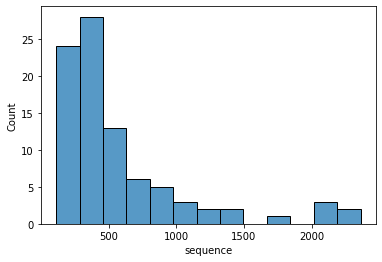

In [ ]:
new_validation_for_motif =  validation.loc[validation['label'] == 1]

import numpy as np
lengths = new_validation_for_motif["sequence"].apply(kmer2seq).str.len()
import seaborn as sns
sns.histplot(lengths, stat="count")

In [ ]:
import random
new_validation_for_motif =  validation.loc[validation['label'] == 1]
add_test_set = test.loc[test['label'] == 1]
new_validation_for_motif = pd.concat([new_validation_for_motif, add_test_set])
for i in new_validation_for_motif['sequence']:
  main_seq = kmer2seq(i)
  length = len(main_seq)
  neg_seq = main_seq
  while(neg_seq == main_seq):
    chromosome = random.randint(1, 16)
    f = open("/content/drive/MyDrive/Bioinformatics/chromosome/{}.fsa".format(chromosome), "r")
    data = f.read().replace('\n', '')
    start = random.randint(0, len(data) - length)
    if (start < 0):
      continue
    end = start + length
    if (end >= len(data)):
      continue
    neg_seq = data[start: end]
  # this is not very efficient. random sequences should be selected from non_cut sections of the chromosome. also consider the intersections
  assert (len(neg_seq) == length)
  df2 = {'sequence': seq2kmer(neg_seq), 'label':0}
  new_validation_for_motif = new_validation_for_motif.append(df2, ignore_index = True)
new_validation_for_motif
  

,sequence,label
0,TAGTCG AGTCGA GTCGAT TCGATA CGATAT GATATA ATAT...,1
1,ATACGT TACGTA ACGTAT CGTATA GTATAT TATATA ATAT...,1
2,CAGAAT AGAATC GAATCA AATCAT ATCATG TCATGG CATG...,1
3,TCTATT CTATTG TATTGC ATTGCA TTGCAT TGCATT GCAT...,1
4,GAATTG AATTGC ATTGCA TTGCAG TGCAGG GCAGGG CAGG...,1
...,...,...
339,GCCGGT CCGGTT CGGTTT GGTTTC GTTTCG TTTCGG TTCG...,0
340,CGCAAA GCAAAC CAAACA AAACAT AACATC ACATCA CATC...,0
341,AACCAC ACCACA CCACAA CACAAA ACAAAA CAAAAC AAAA...,0
342,ATATAC TATACC ATACCC TACCCA ACCCAC CCCACA CCAC...,0


In [ ]:
validation

,sequence,label
0,TAGTCG AGTCGA GTCGAT TCGATA CGATAT GATATA ATAT...,1
1,CTCTCG TCTCGG CTCGGT TCGGTA CGGTAG GGTAGC GTAG...,0
2,ATACGT TACGTA ACGTAT CGTATA GTATAT TATATA ATAT...,1
3,CAGAAT AGAATC GAATCA AATCAT ATCATG TCATGG CATG...,1
4,TCTATT CTATTG TATTGC ATTGCA TTGCAT TGCATT GCAT...,1
...,...,...
127,AGAAGA GAAGAA AAGAAG AGAAGT GAAGTA AAGTAT AGTA...,1
128,TTTTAA TTTAAA TTAAAA TAAAAC AAAACG AAACGA AACG...,1
129,CTAGTA TAGTAC AGTACT GTACTA TACTAT ACTATT CTAT...,1
130,GCTAGG CTAGGC TAGGCA AGGCAG GGCAGA GCAGAA CAGA...,0


In [ ]:
new_validation_for_motif.to_csv("/content/data/dev.tsv" ,index=False,encoding='utf-8', sep='\t')
os.environ['DATA_PATH'] = "/content/data"

In [ ]:
import os
KMER=6
os.environ['PREDICTION_PATH']="/content/prediction"
os.environ['MODEL_PATH'] = "/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/output"
# os.environ['MODEL_PATH'] = "/content/drive/MyDrive/Bioinformatics/6-new-12w-0"
!python run_finetune.py\
    --model_type dna \
    --do_eval\
    --tokenizer_name=dna6 \
    --model_name_or_path $MODEL_PATH \
    --task_name dnaprom \
    --do_predict \
    --data_dir $DATA_PATH  \
    --max_seq_length 512 \
    --per_gpu_pred_batch_size=256   \
    --output_dir $MODEL_PATH \
    --predict_dir $PREDICTION_PATH \
    --n_process 48

<class 'transformers.tokenization_dna.DNATokenizer'>
<class 'transformers.tokenization_dna.DNATokenizer'>
finish loading examples
number of processes for converting feature: 12
1 processor started !
2 processor started !
3 processor started !
4 processor started !
5 processor started !
6 processor started !
7 processor started !
8 processor started !
9 processor started !
10 processor started !
11 processor started !
12 processor started !
Evaluating: 100% 43/43 [00:11<00:00,  3.89it/s]
<class 'transformers.tokenization_dna.DNATokenizer'>
Predicting: 100% 2/2 [00:10<00:00,  5.21s/it]


In [ ]:
import numpy as np
# predicted = np.load('/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/prediction/pred_results.npy')
predicted = np.load('/content/prediction/pred_results.npy')

In [ ]:
new_validation_for_motif
y_test = new_validation_for_motif['label']
y_test

0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: label, Length: 344, dtype: int64

In [ ]:
y_test.value_counts()

1    172
0    172
Name: label, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, predicted))

0.6664244186046512


ROC AUC=0.666


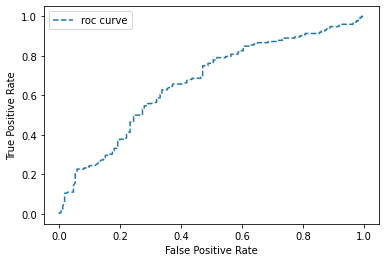

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, predicted)
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predicted)
# plot the roc curve for the model
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--', label='roc curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
predicted[predicted > 0.5] = 1
predicted[predicted < 0.5] = 0
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predicted)


In [ ]:
confusion_matrix

array([[ 39, 133],
       [ 19, 153]])

In [ ]:
cd ../examples


/content/drive/MyDrive/Bioinformatics/DNABERT-master/examples


In [ ]:
!python run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna6 \
    --model_name_or_path $MODEL_PATH \
    --task_name dnaprom \
    --do_visualize \
    --visualize_data_dir $DATA_PATH \
    --visualize_models 6 \
    --data_dir $DATA_PATH \
    --max_seq_length 512 \
    --per_gpu_pred_batch_size=16   \
    --output_dir $MODEL_PATH \
    --predict_dir $PREDICTION_PATH \
    --n_process 96

<class 'transformers.tokenization_dna.DNATokenizer'>
finish loading examples
number of processes for converting feature: 24
1 processor started !
2 processor started !
3 processor started !
4 processor started !
5 processor started !
6 processor started !
7 processor started !
8 processor started !
9 processor started !
10 processor started !
11 processor started !
12 processor started !
13 processor started !
14 processor started !
15 processor started !
16 processor started !
17 processor started !
18 processor started !
19 processor started !
20 processor started !
21 processor started !
22 processor started !
23 processor started !
24 processor started !
tcmalloc: large alloc 8657043456 bytes == 0x7f9b94000000 @  0x7f9ef5678001 0x7f9ef20551af 0x7f9ef20abc23 0x7f9ef20aca87 0x7f9ef214e823 0x58f62c 0x5105e2 0x5b575e 0x58ff2e 0x50d482 0x5b575e 0x58ff2e 0x50c4fc 0x5b4ee6 0x6005a3 0x607796 0x60785c 0x60a436 0x64db82 0x64dd2e 0x7f9ef5273c87 0x5b636a
Predicting: 100% 22/22 [00:16<00:00,  1

In [ ]:
import numpy as np

attention = np.load('/content/prediction/atten.npy')
attention.shape

(344, 512)

In [ ]:
os.environ['MOTIF_PATH'] = "/content/motif"
KMER=6
# os.environ['PREDICTION_PATH']="/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/prediction"
# os.environ['MODEL_PATH'] = "/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/output"
# os.environ['DATA_PATH'] = "/content/drive/MyDrive/Bioinformatics/danbert_fintune_results/1/data"

In [ ]:
cd ../motif

/content/drive/MyDrive/Bioinformatics/DNABERT-master/motif


In [ ]:
!pip install colab-xterm
%load_ext colabxterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 16.1 MB/s 


In [ ]:
!chmod 755 '/content/motifs.sh'

In [ ]:
!'/content/motifs.sh'

*** Begin motif analysis ***
* pos_seqs: 172; neg_seqs: 172
* Finding high attention motif regions
* Filtering motifs by hypergeometric test
* Merging similar motif instances
* Making fixed_length window = 5
* Removing motifs with less than 2 instances
* Saving outputs to directory
*** Begin motif analysis ***
* pos_seqs: 172; neg_seqs: 172
* Finding high attention motif regions
* Filtering motifs by hypergeometric test
* Merging similar motif instances
* Making fixed_length window = 6
* Removing motifs with less than 2 instances
* Saving outputs to directory
*** Begin motif analysis ***
* pos_seqs: 172; neg_seqs: 172
* Finding high attention motif regions
* Filtering motifs by hypergeometric test
* Merging similar motif instances
* Making fixed_length window = 7
* Removing motifs with less than 2 instances
* Saving outputs to directory
*** Begin motif analysis ***
* pos_seqs: 172; neg_seqs: 172
* Finding high attention motif regions
* Filtering motifs by hypergeometric test
* Merging 

In [ ]:
for i in {5..30}
do
python find_motifs.py \
    --data_dir $DATA_PATH \
    --predict_dir $PREDICTION_PATH \
    --window_size $i \
    --min_len 3 \
    --pval_cutoff 0.05 \
    --min_n_motif 2 \
    --align_all_ties \
    --save_file_dir $MOTIF_PATH \
    --verbose
done



SyntaxError: ignored

In [ ]:
from PIL import Image                                                                                
img = Image.open('/content/motif/motif_TTTT_1_weblogo.png')
img.show() 

UnidentifiedImageError: ignored